### Step 1: Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
%tensorflow_version X.X
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0


### Step 2: Import Data

In [ ]:
# prompt: read excel file to df

#df = pd.read_excel('Assignment1-OnlineUse.xlsx') # Replace with your file path
df = pd.read_csv('Assignment1-OnlineUse.csv') # Replace with your file path
print(df.head())


   ClinicID  Online_use-patient   malepct     unemp  age16to24  age25to34  \
0         1            0.059697  0.478453  0.108287   0.058701   0.181771   
1         2            0.133762  0.474550  0.106176   0.146846   0.139272   
2         3            0.060985  0.404530  0.036369   0.067028   0.125814   
3         4            0.098957  0.398067  0.020966   0.101616   0.073968   
4         5            0.099779  0.467494  0.034454   0.108035   0.181779   

   age35to44  age45to54  age55to64  age65to74  ...  phoneeasy  onlineasy  \
0   0.099166   0.182478   0.142989   0.154677  ...   0.465492   0.767291   
1   0.072946   0.218530   0.165720   0.139868  ...   0.717218   0.941951   
2   0.195154   0.170479   0.181745   0.140921  ...   0.857945   0.976829   
3   0.205223   0.143792   0.132499   0.200629  ...   0.688784   0.941920   
4   0.114250   0.120209   0.230567   0.127471  ...   0.682212   0.848249   

       race  longstdhealth  canmngownhealth  reducedability  prefgpalways  \
0  

In [ ]:
df.describe()

,ClinicID,Online_use-patient,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,numpats
count,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,...,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000
mean,3433.955520,-0.275784,0.280781,-0.798515,-0.107225,-0.047214,-0.046070,-0.034878,-0.054384,-0.115166,...,-2.199142,0.505411,0.556106,0.499406,0.294733,-0.697068,-0.910472,-2.818920,0.181628,8602.899665
std,1979.666145,6.336193,4.555625,9.029420,4.537486,4.540538,4.540364,4.540680,4.539775,4.836541,...,14.603595,4.569787,4.569823,4.873980,4.706465,12.126106,12.041775,17.665926,4.706001,5505.261843
min,1.000000,-98.000000,-97.000000,-98.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-98.000000,...,-98.000000,-97.000000,-97.000000,-98.000000,-97.000000,-97.000000,-97.000000,-97.000000,-98.000000,52.000000
25%,1720.000000,0.071262,0.456042,0.013109,0.067684,0.110932,0.122315,0.149422,0.130647,0.093296,...,0.016490,0.587549,0.696144,0.602607,0.466276,0.777394,0.526255,0.341212,0.292448,4789.000000
50%,3434.000000,0.121351,0.491844,0.031490,0.097406,0.154838,0.159599,0.177183,0.160535,0.126595,...,0.026545,0.747523,0.786471,0.857188,0.526774,0.838955,0.594081,0.476141,0.408581,7561.000000
75%,5148.000000,0.185537,0.528592,0.060564,0.130934,0.206898,0.204315,0.204646,0.186348,0.158520,...,0.038273,0.875644,0.859733,0.941521,0.581587,0.890055,0.663461,0.618552,0.523646,11106.000000
max,6862.000000,0.667375,0.842727,0.595147,0.907279,0.693660,0.444190,0.351420,0.320268,0.309528,...,0.581492,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980203,0.958600,73488.000000


In [ ]:
df.columns

Index(['ClinicID', 'Online_use-patient', 'malepct', 'unemp', 'age16to24',
       'age25to34', 'age35to44', 'age45to54', 'age55to64', 'age65to74',
       'age75to84', 'age85plus', 'phoneeasy', 'onlineasy', 'race',
       'longstdhealth', 'canmngownhealth', 'reducedability', 'prefgpalways',
       'bcaaware', 'vendor', 'numpats'],
      dtype='object')

In [ ]:
# prompt: unique values in df['Category']

unique_values = df['vendor'].unique()
print(unique_values)


['TPP' 'EMIS' 'EMIS (I)' 'VISION' 'MICROTEST' 'VISION (I)']


In [ ]:
df.isnull().sum()

,0
ClinicID,0
Online_use-patient,0
malepct,0
unemp,0
age16to24,0
age25to34,0
age35to44,0
age45to54,0
age55to64,0
age65to74,0


####Visualise distributions

In [ ]:
# import matplotlib.pyplot as plt

# # extra code – the next 5 lines define the default font sizes
# plt.rc('font', size=12)
# plt.rc('axes', labelsize=12, titlesize=12)
# plt.rc('legend', fontsize=12)
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)

# df.hist(bins=50, figsize=(20, 12))

# plt.show()

### Step 3: Data *Preprocessing*

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, OneHotEncoder,  QuantileTransformer, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split



Categorical: One Hot Encoding: 'vendor'

In [ ]:
df_one_hot = pd.get_dummies(df, columns=['vendor'])

**Train/Validation Split**

In [ ]:
# Features are all columns except 'Target'
X = df_one_hot.drop(columns=['ClinicID', 'Online_use-patient'], axis=1)
# Target variable is 'Target'
y = df_one_hot['Online_use-patient']


# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5485, 25)
X_test shape: (1372, 25)
y_train shape: (5485,)
y_test shape: (1372,)


In [ ]:
X.columns

Index(['malepct', 'unemp', 'age16to24', 'age25to34', 'age35to44', 'age45to54',
       'age55to64', 'age65to74', 'age75to84', 'age85plus', 'phoneeasy',
       'onlineasy', 'race', 'longstdhealth', 'canmngownhealth',
       'reducedability', 'prefgpalways', 'bcaaware', 'numpats', 'vendor_EMIS',
       'vendor_EMIS (I)', 'vendor_MICROTEST', 'vendor_TPP', 'vendor_VISION',
       'vendor_VISION (I)'],
      dtype='object')

In [ ]:
df_one_hot.columns

Index(['ClinicID', 'Online_use-patient', 'malepct', 'unemp', 'age16to24',
       'age25to34', 'age35to44', 'age45to54', 'age55to64', 'age65to74',
       'age75to84', 'age85plus', 'phoneeasy', 'onlineasy', 'race',
       'longstdhealth', 'canmngownhealth', 'reducedability', 'prefgpalways',
       'bcaaware', 'numpats', 'vendor_EMIS', 'vendor_EMIS (I)',
       'vendor_MICROTEST', 'vendor_TPP', 'vendor_VISION', 'vendor_VISION (I)'],
      dtype='object')

### Step 4: Build Model


####Baseline models

##### Baseline model 1

In [ ]:
baseline_model = keras.Sequential([
    keras.layers.Dense(26, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)  # linear/relu in the output layer
])

#optimizer = tf.keras.optimizers.RMSprop(0.001) # Gradient Descent algorithm
#optimizer = tf.keras.optimizers.Adam()

# Compile the model with categorical_crossentropy
baseline_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display the model's architecture
baseline_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 26)                  │             676 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 703 (2.75 KB)

 Trainable params: 703 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

**Fit Model**

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
b_history = baseline_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data= (X_test, y_test), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.1137 - mean_absolute_error: 3.5310
Test Accuracy: 3.61


**Lowest Validation Error**

In [ ]:
# Print the lowest validation error
lowest_validation_error = min(b_history.history['val_loss'])
print(f'Lowest Validation Error: {lowest_validation_error:.4f}')

Lowest Validation Error: 21.0886


#####Baseline model 2

In [ ]:
# Regularized model

baseline_model = keras.Sequential()
baseline_model.add(keras.layers.Dense(26, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],))),
baseline_model.add(keras.layers.Dense(16, activation=tf.nn.relu,)),
baseline_model.add(keras.layers.Dense(8, activation=tf.nn.relu,)),
baseline_model.add(keras.layers.Dense(8, activation=tf.nn.relu,)),

baseline_model.add(keras.layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop() # Gradient Descent algorithm
optimizer = tf.keras.optimizers.Adam()

baseline_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
baseline_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 26)                  │             676 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,325 (5.18 KB)

 Trainable params: 1,325 (5.18 KB)

 Non-trainable params: 0 (0.00 B)

**Fit Model**

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

class TrackValidationLoss(keras.callbacks.Callback):
    def __init__(self):
        super(TrackValidationLoss, self).__init__()
        self.lowest_val_loss = np.inf  # Start with infinity

    def on_epoch_end(self, epoch, logs):
        current_val_loss = logs.get('val_loss')
        if current_val_loss < self.lowest_val_loss:
            self.lowest_val_loss = current_val_loss
            print(f'\nLowest validation loss updated: {self.lowest_val_loss:.4f}')

# Create an instance of the custom callback
track_val_loss = TrackValidationLoss()

EPOCHS = 200
b_history = baseline_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data= (X_test, y_test), verbose=0,
                    callbacks=[PrintDot(), track_val_loss])



.
Lowest validation loss updated: 39.0327
.
Lowest validation loss updated: 32.2180
.
Lowest validation loss updated: 27.7181
.
Lowest validation loss updated: 23.1537
.
Lowest validation loss updated: 21.6504
..
Lowest validation loss updated: 21.2789
....
Lowest validation loss updated: 21.2246
.
Lowest validation loss updated: 21.1921
...
Lowest validation loss updated: 21.1682
..................
Lowest validation loss updated: 21.1555
.................................................
Lowest validation loss updated: 21.1059
............
Lowest validation loss updated: 21.0839
......
...............................................
Lowest validation loss updated: 21.0742
..............
Lowest validation loss updated: 21.0605
..
Lowest validation loss updated: 21.0384
.
Lowest validation loss updated: 21.0259
...................
Lowest validation loss updated: 21.0182
.................

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4783 - mean_absolute_error: 0.3098
Test Accuracy: 0.42


**Lowest Validation Error**

In [ ]:
# Print the lowest validation error
lowest_validation_error = min(b_history.history['val_loss'])
print(f'Lowest Validation Error: {lowest_validation_error:.4f}')

Lowest Validation Error: 21.0182


###### Plot Results

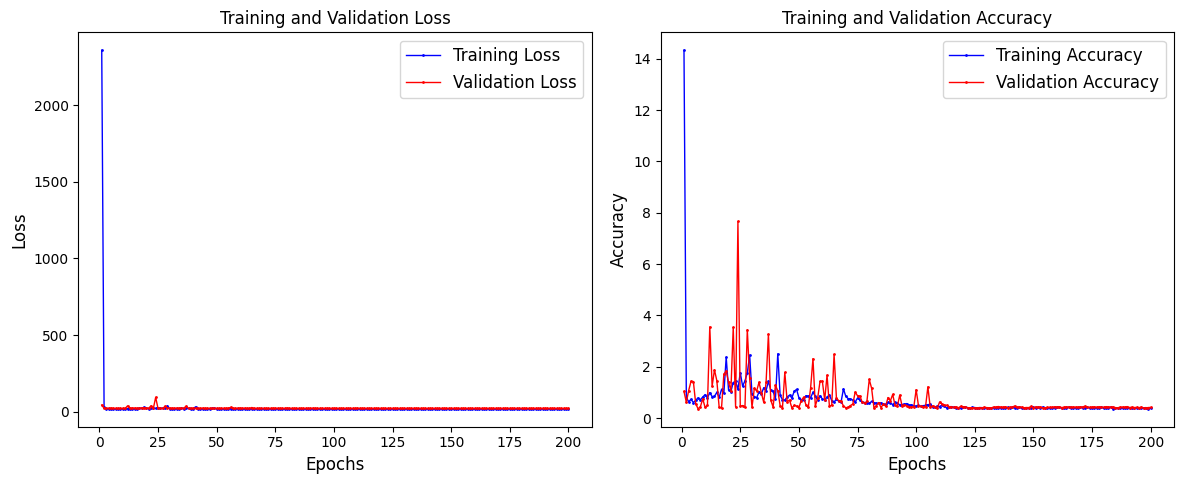

In [ ]:
# Plotting results
train_loss = b_history.history['loss']
val_loss = b_history.history['val_loss']
train_accuracy = b_history.history['mean_absolute_error']
val_accuracy = b_history.history['val_mean_absolute_error']

# Set the number of epochs for x-axis
epochs_range = range(1, EPOCHS + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'bo-', label='Training Loss', linewidth=1, markersize=1)
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss', linewidth=1, markersize=1)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, 'bo-', label='Training Accuracy', linewidth=1, markersize=1)
plt.plot(epochs_range, val_accuracy, 'ro-', label='Validation Accuracy', linewidth=1, markersize=1)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

###### Predictions

In [ ]:
# valpreds = baseline_model.predict_on_batch(X_test)
# print(valpreds)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(y_test)

469      0.218577
2991     0.180341
4684     0.077044
5430     0.152574
2638     0.203936
4233     0.297394
4315     0.123411
5386     0.036584
1393     0.041965
5797     0.204260
5464     0.158061
4205     0.073514
3433     0.366400
4942     0.136085
5690     0.262942
3527     0.120300
4331     0.090402
6075     0.139938
1966     0.141179
1501     0.030905
4528     0.172989
3858     0.136526
5668     0.241254
5900     0.182187
5330     0.132783
1600     0.143376
4414     0.271197
179      0.226132
132      0.207646
960      0.334645
4237     0.262641
5636     0.172278
2526     0.097420
3731     0.282342
6353     0.043420
2619     0.139876
1671     0.237287
1281     0.149270
3090     0.050881
2609     0.133193
4402     0.184992
5889     0.268437
3254     0.092177
6758     0.199428
3707     0.043212
6087     0.212056
6575     0.082441
4918     0.049036
1886     0.144833
3542     0.262213
3483     0.203536
4733     0.090748
6103     0.087186
1379     0.067622
101      0.099034
6548     0

<BarContainer object of 32 artists>

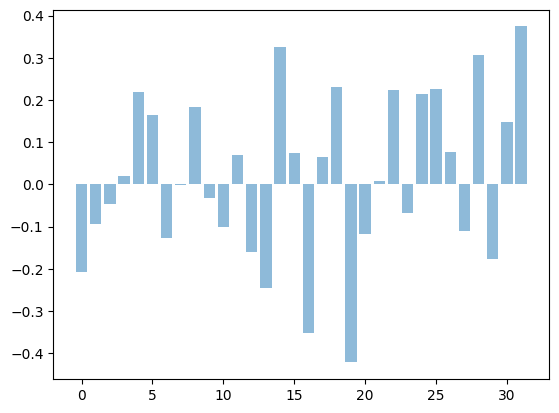

In [ ]:
# Plot Weights
nfw = baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))

plt.bar(y_pos, nfw, align='center', alpha=0.5)

#### Regularized Model

In [ ]:
l1_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(1)

  ])

l1_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

l2_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l2_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
l1_history = l1_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data= (X_test, y_test), verbose=0,
                    callbacks=[PrintDot()])
l2_history = l2_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data= (X_test, y_test), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = l1_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8884 - mean_absolute_error: 0.3490
Test Accuracy: 0.47


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = l2_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6656 - mean_absolute_error: 0.2960
Test Accuracy: 0.41


######Plot Results

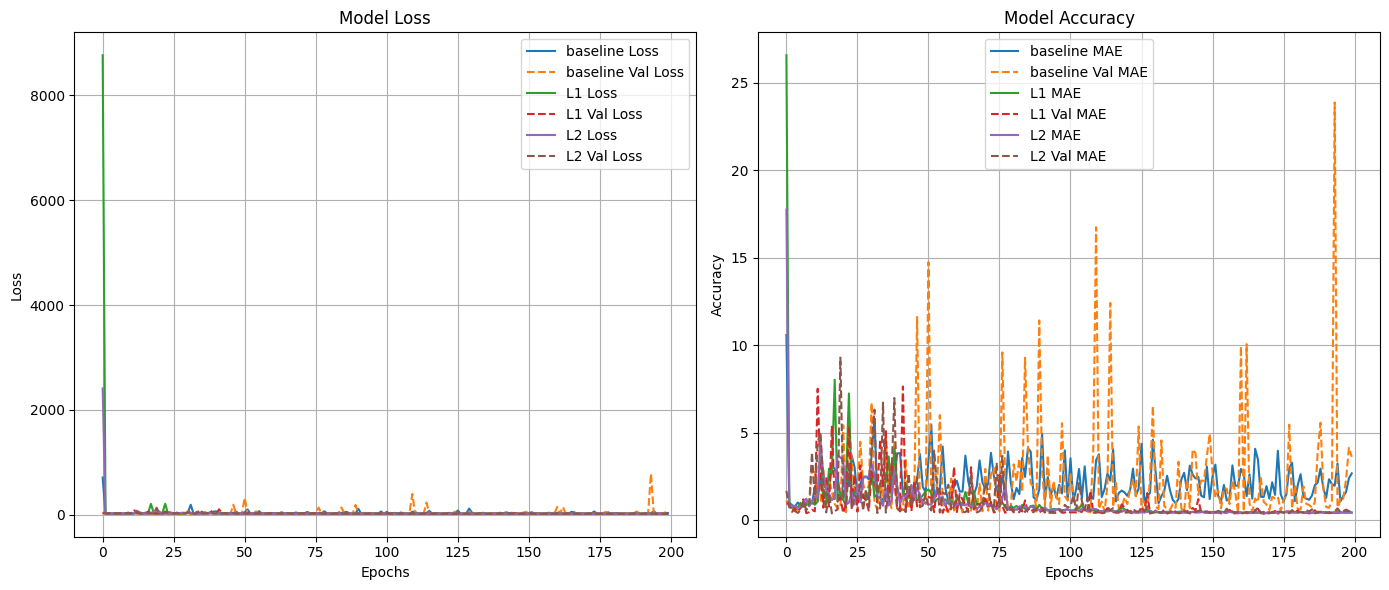

In [ ]:
def plot_history(histories):
    plt.figure(figsize=(14, 6))

    # Plotting loss
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    for label, history in histories:
        plt.plot(history.history['loss'], label=f'{label} Loss')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{label} Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plotting accuracy
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    for label, history in histories:
        plt.plot(history.history['mean_absolute_error'], label=f'{label} MAE')
        plt.plot(history.history['val_mean_absolute_error'], linestyle='--', label=f'{label} Val MAE')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage
plot_history([('baseline', b_history),
               ('L1', l1_history),
               ('L2', l2_history)])

#Conclusion


*   The accuracy of the model using a naïve approach- 0.42
*   The accuracy of the best model: 0.47 using L1- regularization approach

